In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('processed_data.csv')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [4]:
data = data.dropna(subset=['order_id','customer_id'])

## Customer behaviour

<AxesSubplot:xlabel='order_item_id', ylabel='count'>

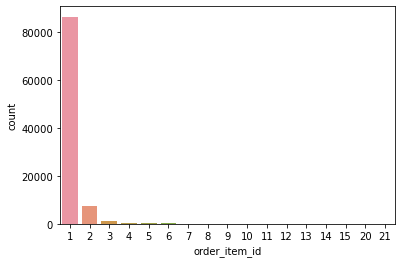

In [5]:
#number of items per purchase
sb.countplot(x='order_item_id', data=data)

From the graph, we can see that most customer only buy one item per purchase.

### Histogram of the price of item

C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

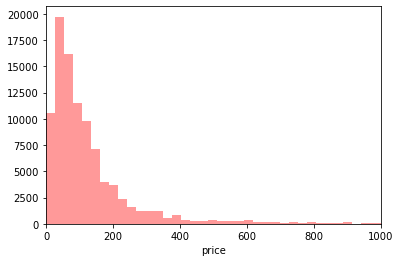

In [6]:
sb.distplot(data['price'],kde=False,bins=500,color='r')
plt.xlim([0,1000])

In [7]:
data['price'].describe()

count    95978.000000
mean       137.146212
std        209.188835
min          0.850000
25%         45.900000
50%         86.800000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

## How about the freight value?

A freight rate (historically and in ship chartering simply freight) is a price at which a certain cargo is delivered from one point to another. The price depends on the form of the cargo, the mode of transport (truck, ship, train, aircraft), the weight of the cargo, and the distance to the delivery destination.

(0.0, 100.0)

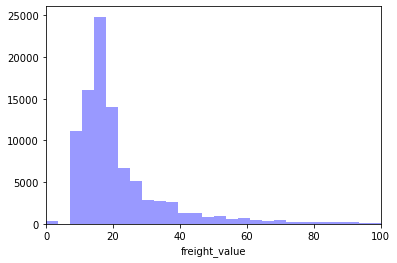

In [8]:
sb.distplot(data['freight_value'],kde=False,bins= 500, color ='b')
plt.xlim([0,100])

In [9]:
#freight rate
data['freight_ratio'] = data['freight_value']/data['price']
data['freight_ratio']

0        0.290764
1        0.191744
2        0.120200
3        0.604444
4        0.438191
           ...   
95973    0.181667
95974    0.114923
95975    0.315646
95976    0.225513
95977    0.268029
Name: freight_ratio, Length: 95978, dtype: float64

Is there any correlation between the price and the freight ratio?

In [42]:
corr = np.corrcoef(data['freight_ratio'],data['price'])[0,1]
print("The correlation between price and the freight ratio is:\t",corr)

The correlation between price and the freight ratio is:	 -0.29903129812975426


It seems there is such a low correlation between these 2. Suggested solution: give a discount or promo for high price, discount in the freight value.

## Customer origin

Text(0, 0.5, 'Order counts')

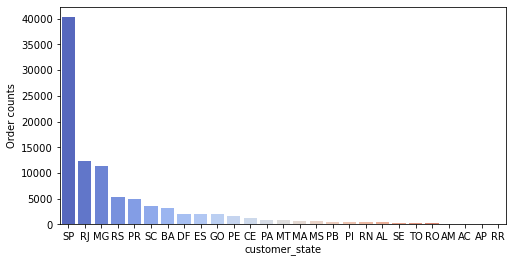

In [10]:
plt.figure(figsize=(8,4))
sb.countplot(x = 'customer_state', data = data,order = data['customer_state'].value_counts().index, palette = "coolwarm")
plt.ylabel('Order counts')

It clearly shows that SP is the state with most orders with significant differences compared to the others

## Review score analysis

First we check the number of occurence for each review score

<AxesSubplot:xlabel='score', ylabel='review_percentage'>

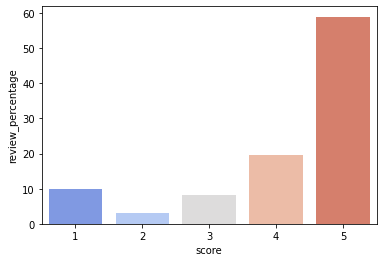

In [11]:
review_counts = data['review_score'].value_counts().to_frame().reset_index()
review_counts['score'] = review_counts['index']
review_counts['review_percentage'] = review_counts['review_score']/sum(review_counts['review_score'])*100
sb.barplot(x='score',y='review_percentage',data=review_counts,palette = "coolwarm")

Next, we see the how these reviews correlate with the customer's state

In [12]:
review_score_state = data.groupby('customer_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score',ascending = False)
review_score_state

,customer_state,review_score
25,SP,4.236100
17,PR,4.231993
2,AM,4.229167
3,AP,4.223881
22,RS,4.182041
10,MG,4.181987
20,RO,4.175000
26,TO,4.165441
11,MS,4.153295
12,MT,4.135074


At this rate, we can assume that the number of high orders in SP correspond to the customer satisfaction in that state. Let's try to plot this!

<Figure size 1152x576 with 0 Axes>

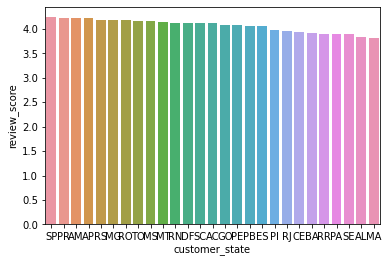

<Figure size 1152x576 with 0 Axes>

In [13]:
sb.barplot(x='customer_state',y='review_score',data=review_score_state)
plt.figure(figsize=(16,8))

From this barplot, we can see that most state are equally satisfied with the orders, giving rate ranging from 3.8 to 4.2

Now we change the columns with date and time to the date-time pandas object

In [14]:
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

Next, we create new features to help us analyse the review score, including estimated delivery time, real delivery time, delay, and review before delivery.

In [15]:
data['estimated_delivery_time'] = (data['order_estimated_delivery_date']-data['order_approved_at']).dt.days.astype('timedelta64[D]')
data['real_delivery_time'] = (data['order_delivered_customer_date']-data['order_approved_at']).dt.days.astype('timedelta64[D]')
data['delay'] = (data['order_delivered_customer_date']-data['order_estimated_delivery_date']).dt.days.astype('timedelta64[D]')
data['review_before_delivery'] = (data['order_delivered_customer_date']-data['review_answer_timestamp']).dt.days.astype('timedelta64[D]')

In [16]:
data['estimated_delivery_time'] = (data['estimated_delivery_time']/np.timedelta64(1, 'D')).astype(int)
data['real_delivery_time'] = (data['real_delivery_time']/np.timedelta64(1, 'D')).astype(int)
data['delay'] = (data['delay']/np.timedelta64(1, 'D')).astype(int)
data['review_before_delivery'] = (data['review_before_delivery']/np.timedelta64(1, 'D')).astype(int)

In [17]:
data['delay'] = data['delay'].apply(lambda x: x if x>0 else 0)
data['review_before_delivery'] = data['review_before_delivery'].apply(lambda x: 1 if x>0 else 0)
data['late'] = data['delay'].apply(lambda x: 1 if x>0 else 0)

C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Samuel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


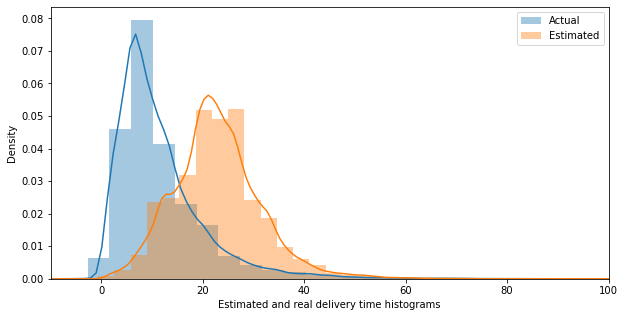

In [18]:
plt.figure(figsize=(10,5))
sb.distplot(data['real_delivery_time'],label='Actual')
sb.distplot(data['estimated_delivery_time'],label='Estimated')
plt.xlim([-10,100])
plt.xlabel('Estimated and real delivery time histograms')
plt.legend()

From the graph, we can see that the actual time taken to deliver the items are to the left of the estimated time, indicating that most of the time, the actual delivery time was faster than the estimated delivery time. It may be one of the main contributor to the high rating given by consumers, but let's continue the analysis.

<AxesSubplot:xlabel='late', ylabel='count'>

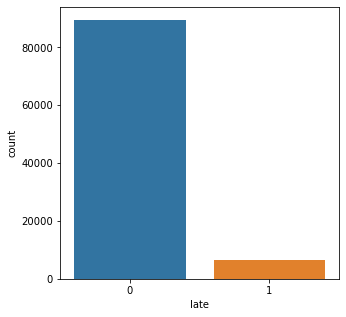

In [20]:
plt.figure(figsize=(5,5))
sb.countplot(x='late', data = data)

As expected, the number of late deliveries is far smaller to the one which is not. But let's take a deeper look into the late deliveries by looking the delay feature which we have created before

In [26]:
total_delay = data[data['delay']>0].delay.sum()
numbers_of_delay = data[data['delay']>0].delay.count()
average_delay= total_delay/numbers_of_delay
print("The average delay of the deliveries is",average_delay,"minutes")

The average delay of the deliveries is 10.62257766840972 minutes


11 minutes are quite a delay. It might be one of the factor of consumers giving low scores. Let's now see the average delay in different places.

In [30]:
late_data_state= data.groupby('customer_state').agg({'late':'mean'}).sort_values('late',ascending=False)
late_data_state

,late
customer_state,
AL,0.212658
MA,0.175809
SE,0.153614
CE,0.138039
PI,0.136842
RR,0.121951
BA,0.121492
RJ,0.121286
PA,0.111821


As expected, SP with high rating score, has low late frequency, how about we go visualize it?

<AxesSubplot:xlabel='customer_state', ylabel='late'>

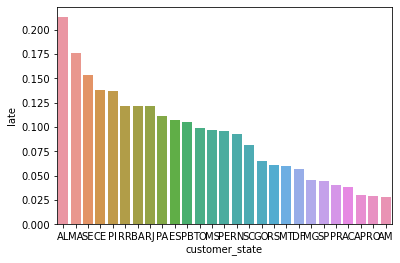

In [33]:
sb.barplot(x = late_data_state.index, y='late', data = late_data_state)

Now, let's see the correlation between this late frequency with the review score

In [37]:
state_late_delivery_freq = data.groupby('customer_state').agg({'late':'mean'}).reset_index()
state_review_score       = data.groupby('customer_state').agg({'review_score':'mean'}).reset_index()
corr = np.corrcoef(state_late_delivery_freq['late'],state_review_score['review_score'])[0,1]
print("The coefficient between the state review score and late rate:\t",corr)

The coefficient between the state review score and late rate:	 -0.894239608845938


What a high correlation! This shows us that when the late rate are low, people will most likely give a high rate score.